# Classification Models for Tweets

### Importing Libraries

In [58]:
import numpy as np
import _pickle as pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import GridSearchCV

### Loading in the Data

In [59]:
# Loading in the DF
with open("main_df.pkl",'rb') as fp:
    main_df = pickle.load(fp)

# Loading in the cleaned tweet data
with open("clean_tweets.pkl",'rb') as fp:
    data = pickle.load(fp)

## Preparing the Data
### Train, test, split

In [60]:
X, y = data, main_df.City

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the words in order to work in the classification models
vectorizer = TfidfVectorizer()

tf_idf_data_train = vectorizer.fit_transform(X_train)

tf_idf_data_test = vectorizer.transform(X_test)

### Function to plot the Confusion Matrix

In [62]:
def plot_confusion_matrix(y_true, y_pred, labels=[False, True], 
                          normalize=False, title=None, cmap=plt.cm.cividis):

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="crimson" if cm[i, j] > thresh else "crimson",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

## Classifier Models
* Dummy Classifier - baseline
* Naive Bayes
* Random Forest
* Logistic Regression
* Support Vector Machine

### Dummy Classifier - Baseline Model

In [63]:
from sklearn.dummy import DummyClassifier

dm_class = DummyClassifier()

dm_class.fit(tf_idf_data_train, y_train)
dm_train_preds = dm_class.predict(tf_idf_data_train)
dm_test_preds = dm_class.predict(tf_idf_data_test)

dm_train_score = accuracy_score(y_train, dm_train_preds)
dm_test_score = accuracy_score(y_test, dm_test_preds)

print('Dummy Classifier')
print(f"Training Accuracy: {dm_train_score} \t\t Testing Accuracy: {dm_test_score}")

Dummy Classifier
Training Accuracy: 0.4995 		 Testing Accuracy: 0.50175


### Confusion Matrix for Dummy Classifier

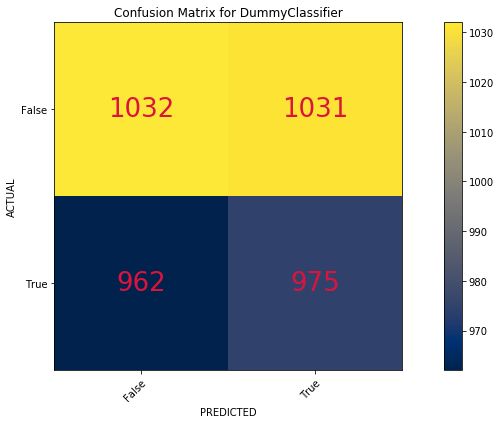

In [64]:
plot_confusion_matrix(y_test, dm_test_preds, title="Confusion Matrix for DummyClassifier")
np.set_printoptions(precision=1)
plt.savefig('dumconmat.png')
# Plot non-normalized confusion matrix
plt.show()

### Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100)

rf_classifier.fit(tf_idf_data_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Random Forest
Training Accuracy: 0.9713 		 Testing Accuracy: 0.603


### Confusion Matrix for Random Forest

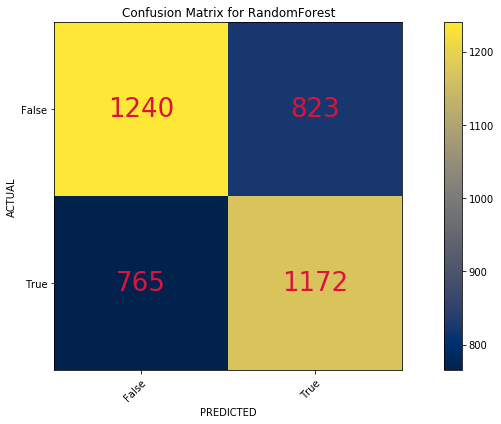

In [66]:
plot_confusion_matrix(y_test, rf_test_preds, title="Confusion Matrix for RandomForest")
np.set_printoptions(precision=1)
plt.savefig("rfconmat.png")
# Plot non-normalized confusion matrix
plt.show()

### Naive Bayes

In [67]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

#nb_classifier = MultinomialNB()
nb_classifier = BernoulliNB()

nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)

nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))

Multinomial Naive Bayes
Training Accuracy: 0.7883 		 Testing Accuracy: 0.6272


### Confusion Matrix for Naive Bayes

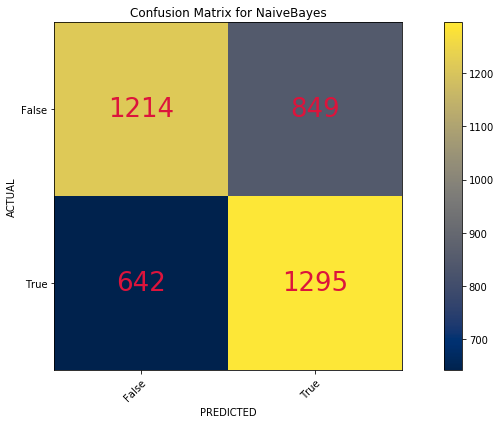

In [68]:
plot_confusion_matrix(y_test, nb_test_preds, title="Confusion Matrix for NaiveBayes")
np.set_printoptions(precision=1)
plt.savefig("nbconmat.png")
# Plot non-normalized confusion matrix
plt.show()

### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

lr_class = LogisticRegression()

lr_class.fit(tf_idf_data_train, y_train)
lr_train_preds = lr_class.predict(tf_idf_data_train)
lr_test_preds = lr_class.predict(tf_idf_data_test)

lr_train_score = accuracy_score(y_train, lr_train_preds)
lr_test_score = accuracy_score(y_test, lr_test_preds)

print('Logistic Regression')
print(f"Training Accuracy: {lr_train_score} \t\t Testing Accuracy: {lr_test_score}")

Logistic Regression
Training Accuracy: 0.783375 		 Testing Accuracy: 0.62725


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### Confusion Matrix for Logistic Regression

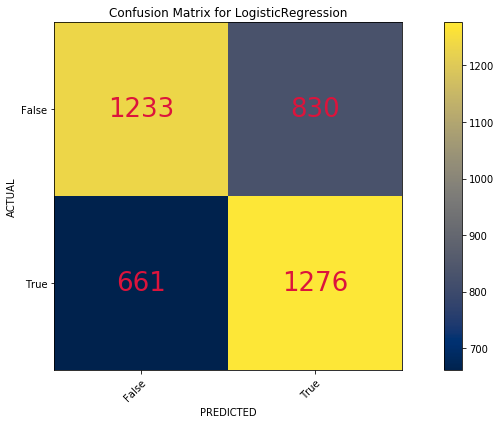

In [70]:
plot_confusion_matrix(y_test, lr_test_preds, title="Confusion Matrix for LogisticRegression")
np.set_printoptions(precision=1)
plt.savefig("lrconmat.png")
# Plot non-normalized confusion matrix
plt.show()

## Support Vector Machine

In [71]:
from sklearn import svm

svm_clf = svm.SVC(kernel='linear')

svm_clf.fit(tf_idf_data_train, y_train)

svm_train_preds = svm_clf.predict(tf_idf_data_train)
svm_test_preds = svm_clf.predict(tf_idf_data_test)

svm_train_score = accuracy_score(y_train, svm_train_preds)
svm_test_score = accuracy_score(y_test, svm_test_preds)

print('SVM')
print(f"Training Accuracy: {svm_train_score} \t\t Testing Accuracy: {svm_test_score}")

SVM
Training Accuracy: 0.80625 		 Testing Accuracy: 0.62225


### Confusion Matrix for SVM

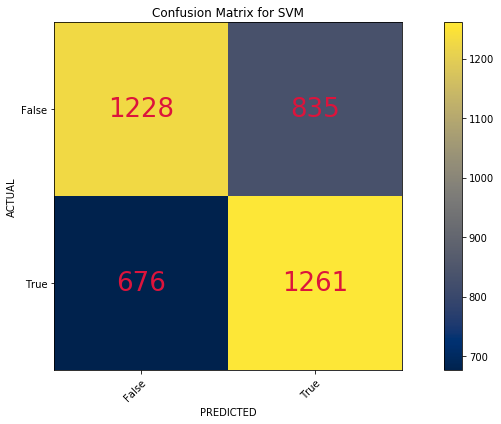

In [72]:
plot_confusion_matrix(y_test, svm_test_preds, title="Confusion Matrix for SVM")
np.set_printoptions(precision=1)
plt.savefig("svmconmat.png")
# Plot non-normalized confusion matrix
plt.show()

### Out of all the models, Naive Bayes performed the best with a Testing Accuracy score of 62.5%